<a href="https://www.kaggle.com/code/rajatraj0502/global-country-information-dataset-2023?scriptVersionId=137674513" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/countries-of-the-world-2023/world-data-2023.csv


In [2]:
import pandas as pd

# Checking the extracted files
pd.read_csv('/kaggle/input/countries-of-the-world-2023/world-data-2023.csv').head()


,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [3]:
# Loading the data from the correct file
df = pd.read_csv('/kaggle/input/countries-of-the-world-2023/world-data-2023.csv')

# Displaying the first few rows
df.head()



,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [4]:
# Displaying the column names
df.columns


Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [5]:
# Displaying the column names
df.columns


Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [6]:
# Displaying the column names
df.columns


Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [7]:
# Check the actual column names in the dataframe
column_names = df.columns
column_names


Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [8]:
# Check the unique values in the 'CPI' column
df['CPI'].unique()


array(['149.9', '119.05', '151.36', nan, '261.73', '113.81', '232.75',
       '129.18', '119.8', '118.06', '156.32', '116.22', '117.59',
       '179.68', '134.09', '117.11', '105.68', '110.71', '167.18',
       '148.32', '104.9', '149.75', '167.4', '99.03', '114.42', '106.58',
       '182.11', '111.61', '110.5', '127.63', '118.65', '116.76',
       '186.86', '117.7', '131.91', '125.08', '140.95', '103.62',
       '124.74', '128.85', '109.82', '102.51', '116.48', '133.85',
       '110.35', '120.25', '103.87', '135.5', '124.14', '288.57',
       '111.23', '124.35', '122.14', '143.86', '132.3', '112.33',
       '110.05', '122.19', '172.73', '133.61', '112.85', '268.36',
       '101.87', '107.43', '142.92', '262.95', '111.65', '116.19',
       '179.29', '150.34', '121.64', '129', '180.44', '151.18', '550.93',
       '119.86', '108.15', '110.62', '162.47', '105.48', '125.6',
       '182.75', '180.51', '99.55', '126.6', '155.68', '135.87', '116.86',
       '130.02', '155.86', '223.13', '125.

In [9]:
import plotly.express as px

# Geographic heatmap of GDP
fig = px.choropleth(df, locations='Country', locationmode='country names', color='GDP', hover_name='Country', color_continuous_scale=px.colors.sequential.Plasma, title='Global GDP')
fig.show()

# Geographic heatmap of Population
fig = px.choropleth(df, locations='Country', locationmode='country names', color='Population', hover_name='Country', color_continuous_scale=px.colors.sequential.Plasma, title='Global Population')
fig.show()


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5



In [11]:
# Displaying the column names
df.columns


Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

/tmp/ipykernel_20/2188005597.py:12: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



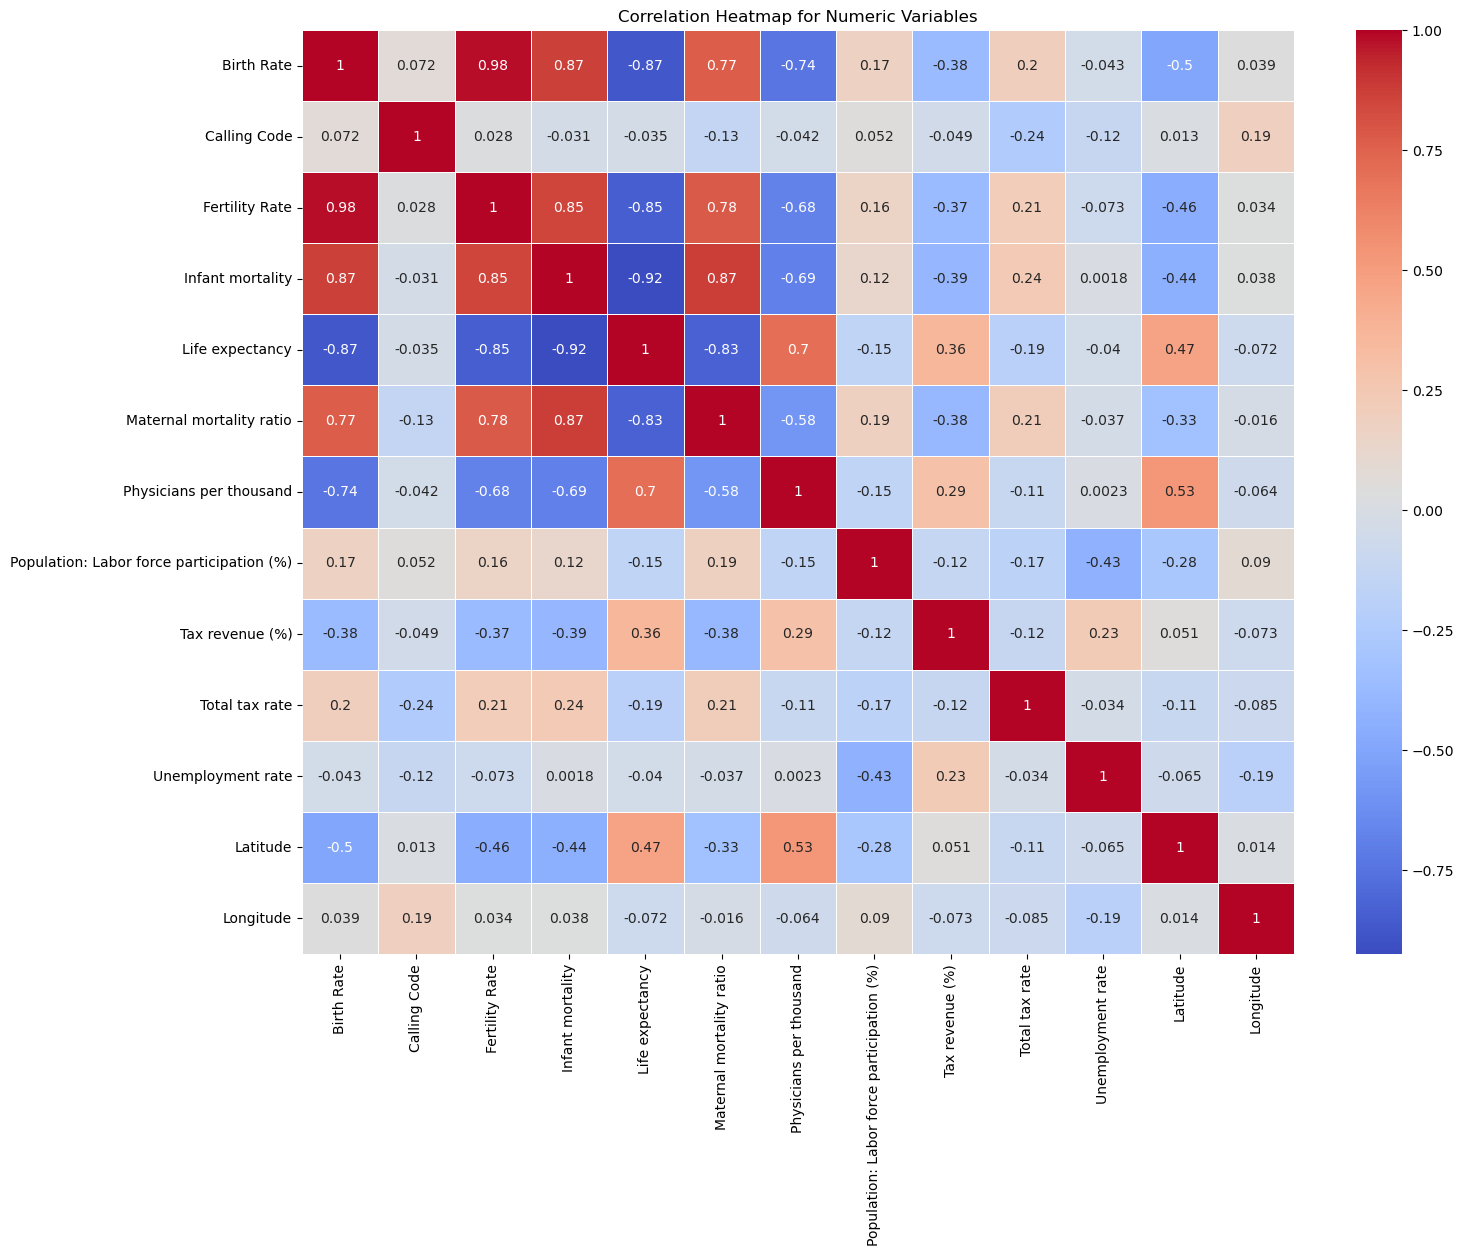

In [12]:
# Preparing the data for correlation heatmap
# Converting necessary columns to numeric values
df['Birth Rate'] = df['Birth Rate'].replace({',': ''}, regex=True).astype(float)
df['Fertility Rate'] = df['Fertility Rate'].replace({',': ''}, regex=True).astype(float)
df['Physicians per thousand'] = df['Physicians per thousand'].replace({',': ''}, regex=True).astype(float)
df['Tax revenue (%)'] = df['Tax revenue (%)'].replace({'%': ''}, regex=True).astype(float)
df['Total tax rate'] = df['Total tax rate'].replace({'%': ''}, regex=True).astype(float)
df['Unemployment rate'] = df['Unemployment rate'].replace({'%': ''}, regex=True).astype(float)
df['Population: Labor force participation (%)'] = df['Population: Labor force participation (%)'].replace({'%': ''}, regex=True).astype(float)

# Creating a correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Numeric Variables')
plt.show()


In [13]:
# Displaying the column names
df.columns


Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

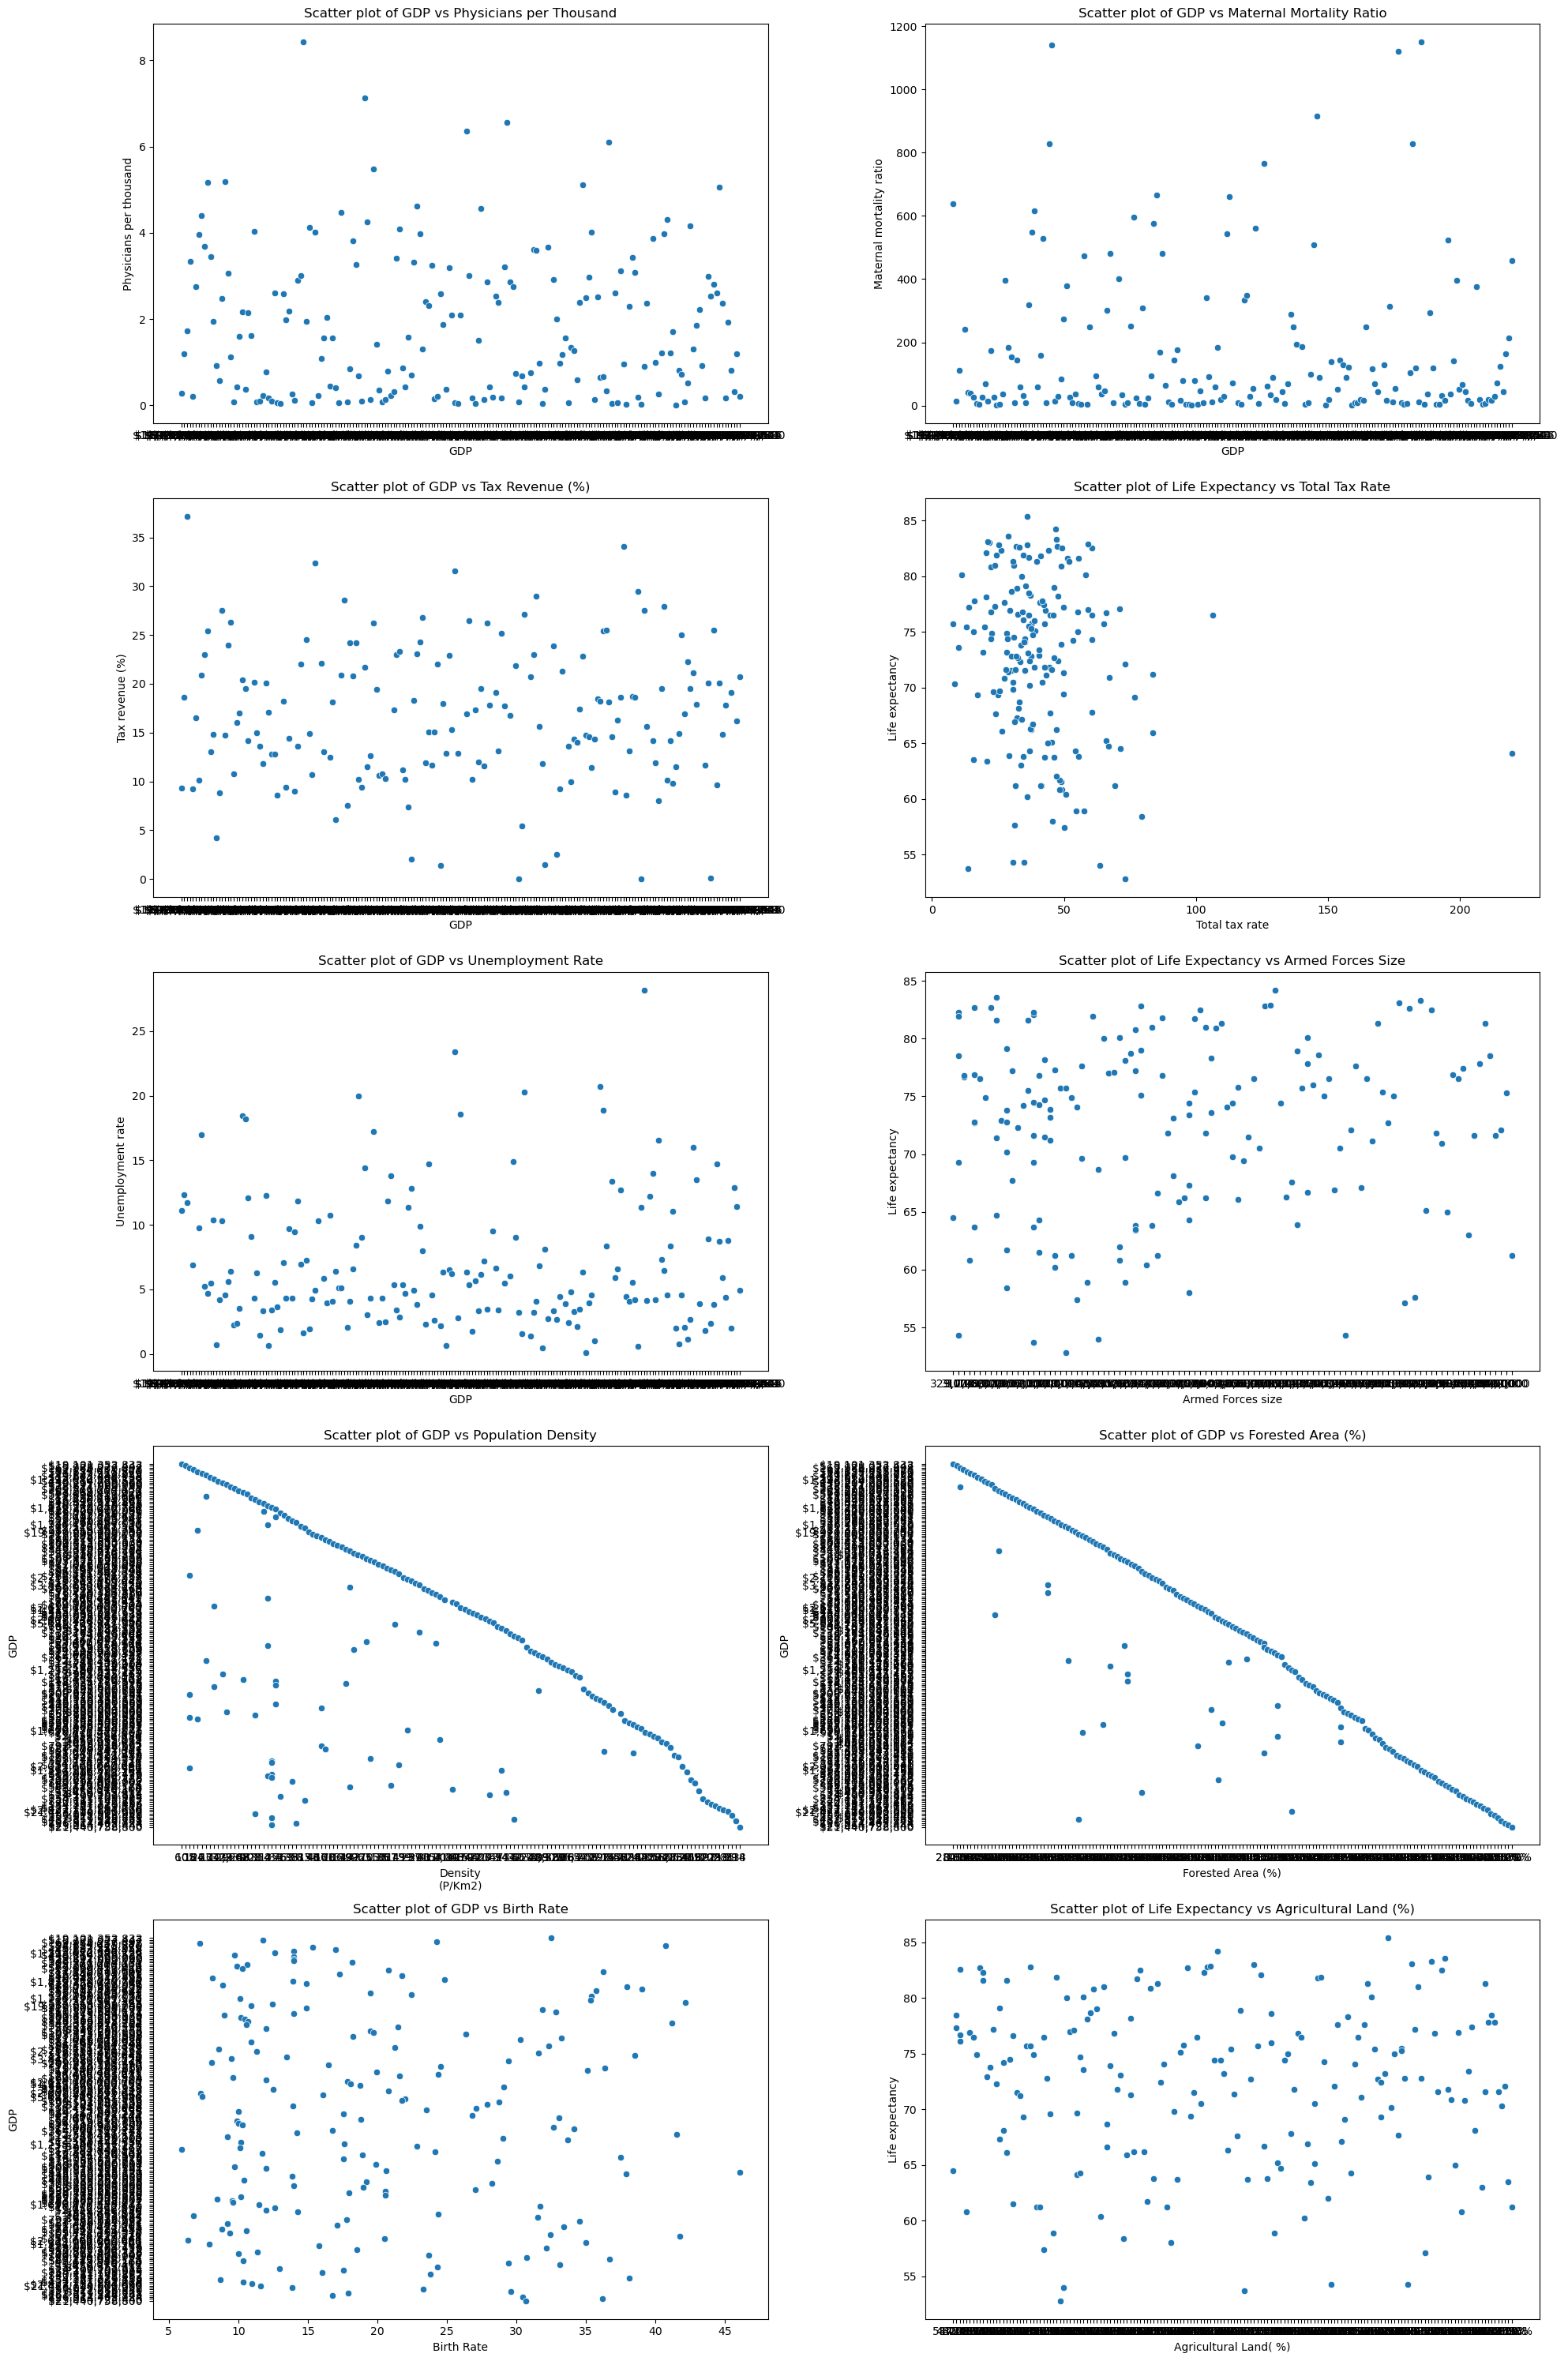

In [14]:
# Preprocessing for additional visualizations
df['Physicians per thousand'] = df['Physicians per thousand'].replace({',': ''}, regex=True).astype(float)
df['Maternal mortality ratio'] = df['Maternal mortality ratio'].replace({',': ''}, regex=True).astype(float)
df['Tax revenue (%)'] = df['Tax revenue (%)'].replace({'%': ''}, regex=True).astype(float)
df['Total tax rate'] = df['Total tax rate'].replace({'%': ''}, regex=True).astype(float)
df['Unemployment rate'] = df['Unemployment rate'].replace({'%': ''}, regex=True).astype(float)

# Create subplots
fig, ax = plt.subplots(5, 2, figsize=(20, 30))

# 1. Scatter plot of GDP vs Physicians per Thousand
sns.scatterplot(x='GDP', y='Physicians per thousand', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Scatter plot of GDP vs Physicians per Thousand')

# 2. Scatter plot of GDP vs Maternal Mortality Ratio
sns.scatterplot(x='GDP', y='Maternal mortality ratio', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Scatter plot of GDP vs Maternal Mortality Ratio')

# 3. Scatter plot of GDP vs Tax Revenue (%)
sns.scatterplot(x='GDP', y='Tax revenue (%)', data=df, ax=ax[1, 0])
ax[1, 0].set_title('Scatter plot of GDP vs Tax Revenue (%)')

# 4. Scatter plot of Life Expectancy vs Total Tax Rate
sns.scatterplot(x='Total tax rate', y='Life expectancy', data=df, ax=ax[1, 1])
ax[1, 1].set_title('Scatter plot of Life Expectancy vs Total Tax Rate')

# 5. Scatter plot of GDP vs Unemployment Rate
sns.scatterplot(x='GDP', y='Unemployment rate', data=df, ax=ax[2, 0])
ax[2, 0].set_title('Scatter plot of GDP vs Unemployment Rate')

# 6. Scatter plot of Life Expectancy vs Armed Forces Size
sns.scatterplot(x='Armed Forces size', y='Life expectancy', data=df, ax=ax[2, 1])
ax[2, 1].set_title('Scatter plot of Life Expectancy vs Armed Forces Size')

# 7. Scatter plot of GDP vs Population Density
sns.scatterplot(x='Density\n(P/Km2)', y='GDP', data=df, ax=ax[3, 0])
ax[3, 0].set_title('Scatter plot of GDP vs Population Density')

# 8. Scatter plot of GDP vs Forested Area (%)
sns.scatterplot(x='Forested Area (%)', y='GDP', data=df, ax=ax[3, 1])
ax[3, 1].set_title('Scatter plot of GDP vs Forested Area (%)')

# 9. Scatter plot of GDP vs Birth Rate
sns.scatterplot(x='Birth Rate', y='GDP', data=df, ax=ax[4, 0])
ax[4, 0].set_title('Scatter plot of GDP vs Birth Rate')

# 10. Scatter plot of Life Expectancy vs Agricultural Land (%)
sns.scatterplot(x='Agricultural Land( %)', y='Life expectancy', data=df, ax=ax[4, 1])
ax[4, 1].set_title('Scatter plot of Life Expectancy vs Agricultural Land (%)')

plt.tight_layout()
plt.show()


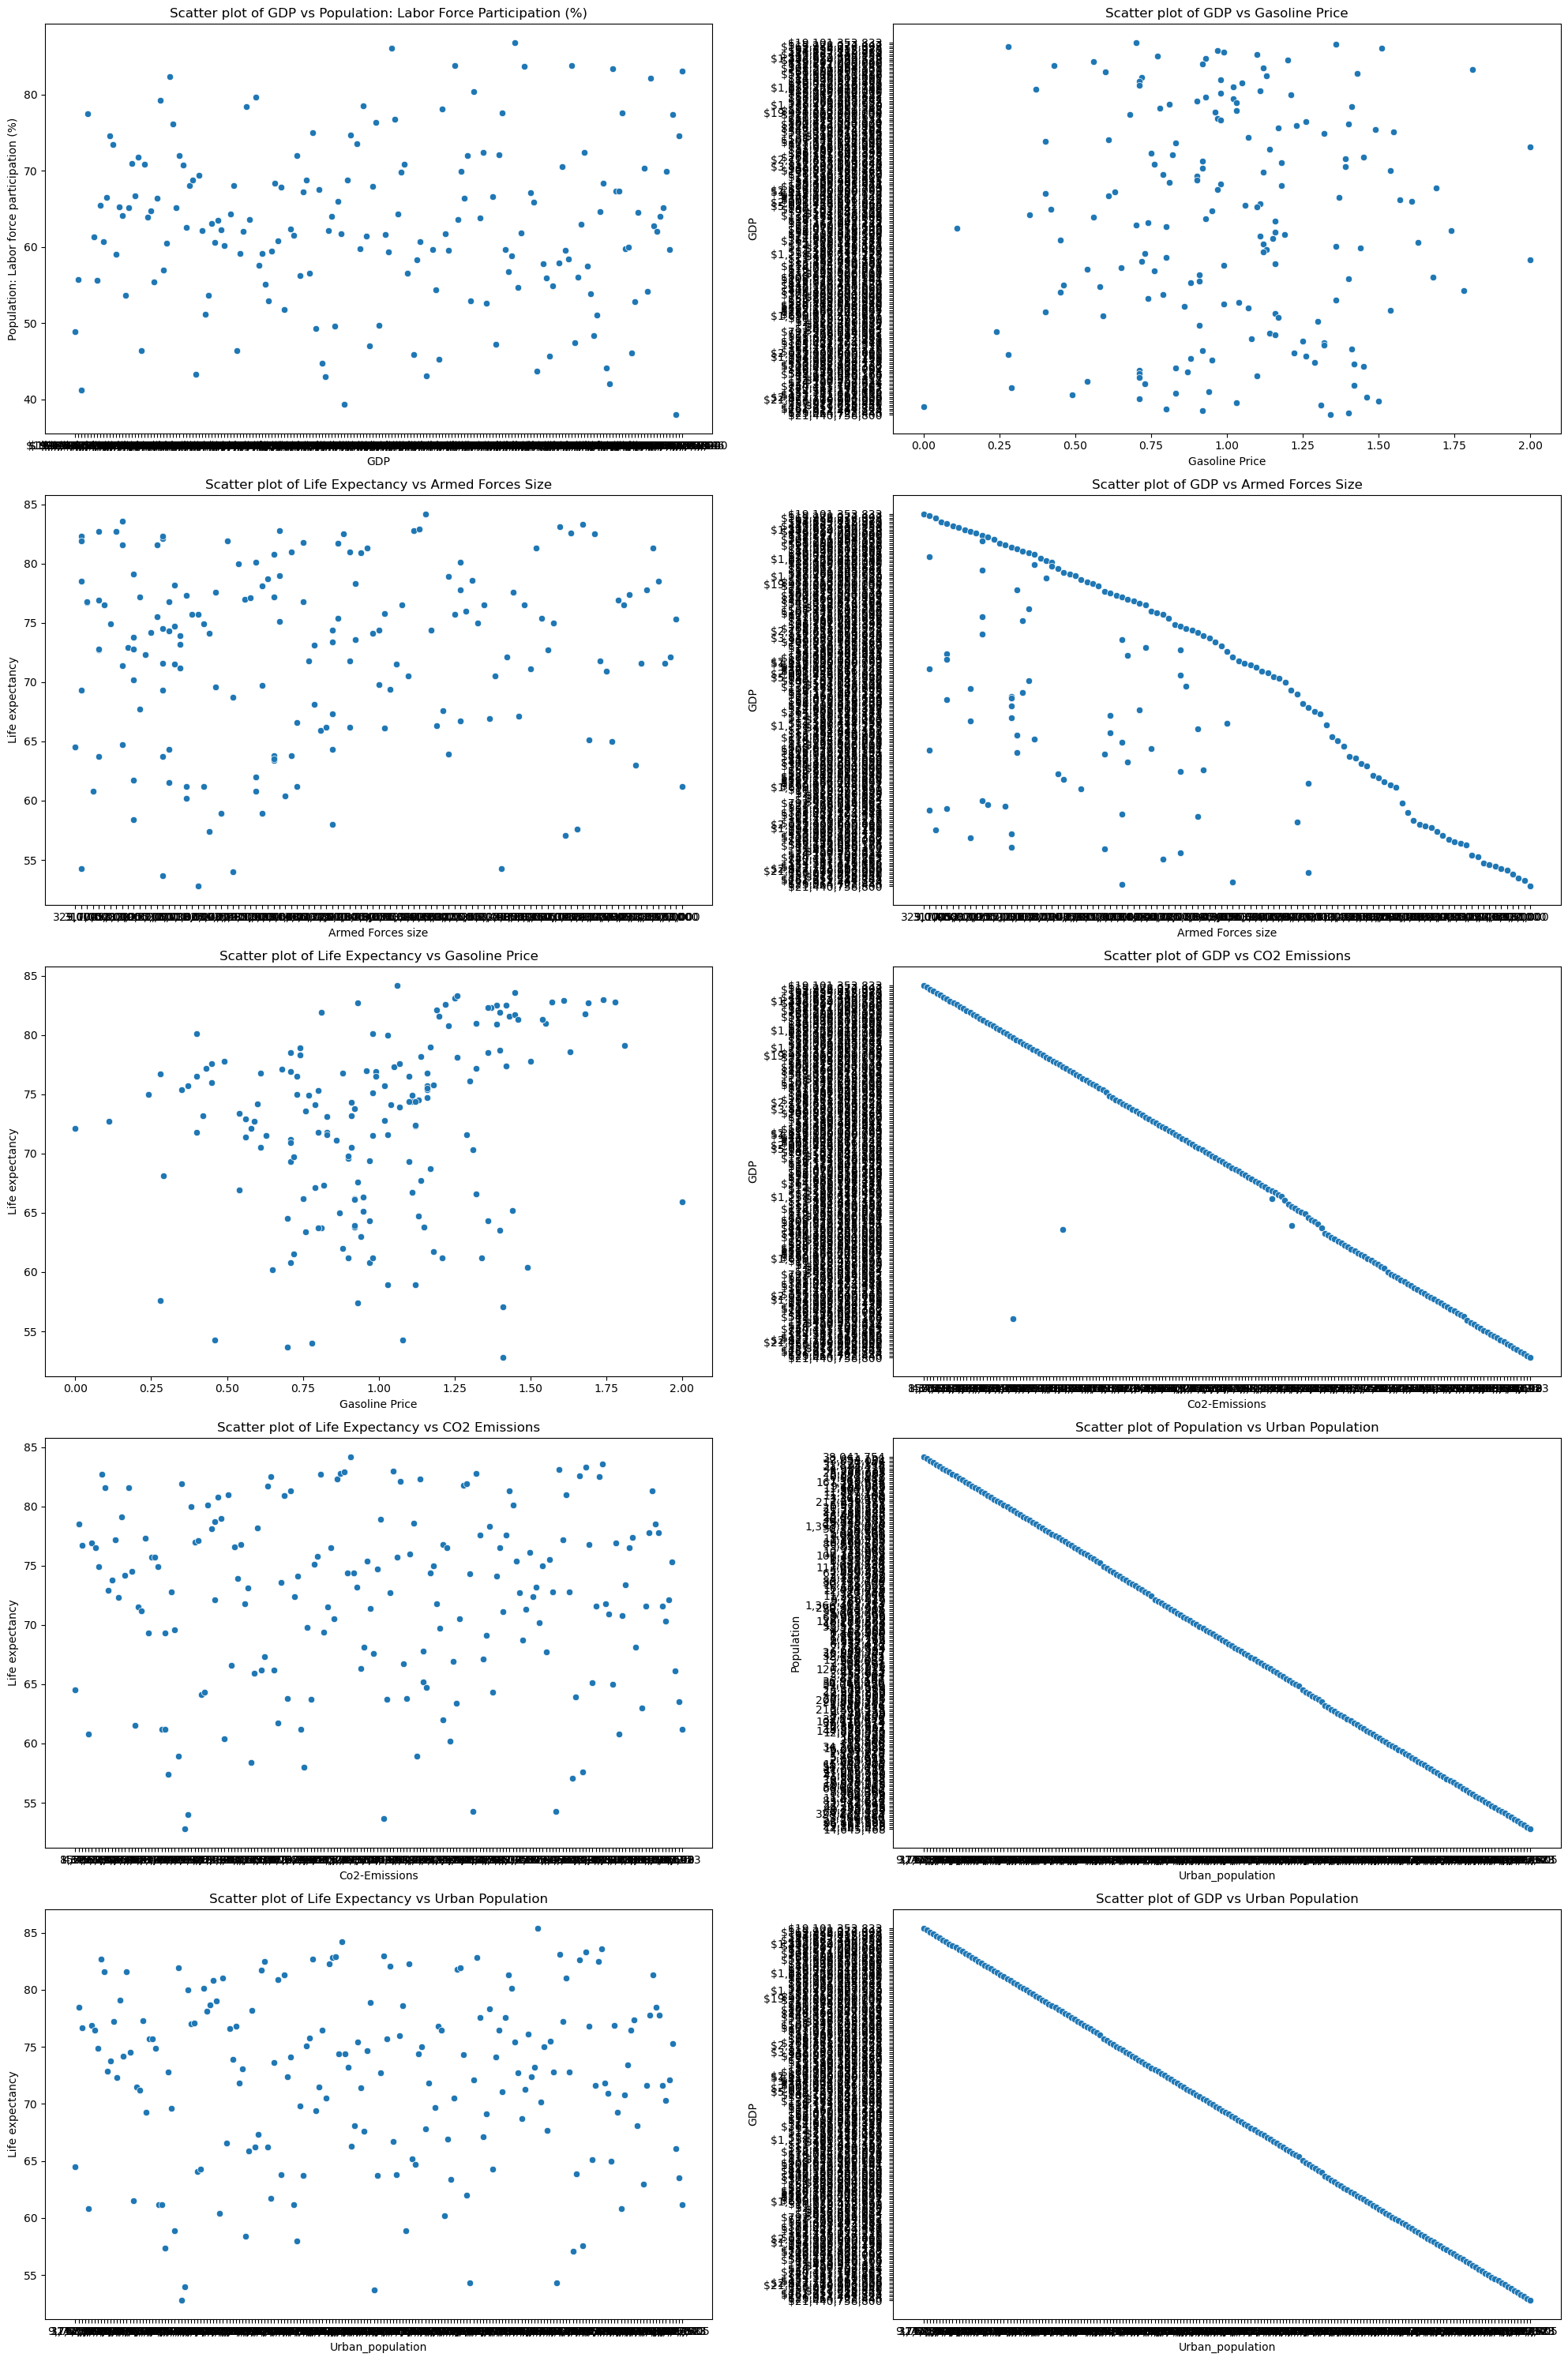

In [15]:
# Converting 'Gasoline Price' to numeric values
df['Gasoline Price'] = df['Gasoline Price'].replace({'\$': '', ',': '', ' ': ''}, regex=True).astype(float)

# Create subplots
fig, ax = plt.subplots(5, 2, figsize=(20, 30))

# 1. Scatter plot of GDP vs Population: Labor Force Participation (%)
sns.scatterplot(x='GDP', y='Population: Labor force participation (%)', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Scatter plot of GDP vs Population: Labor Force Participation (%)')

# 2. Scatter plot of GDP vs Gasoline Price
sns.scatterplot(x='Gasoline Price', y='GDP', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Scatter plot of GDP vs Gasoline Price')

# 3. Scatter plot of Life Expectancy vs Armed Forces Size
sns.scatterplot(x='Armed Forces size', y='Life expectancy', data=df, ax=ax[1, 0])
ax[1, 0].set_title('Scatter plot of Life Expectancy vs Armed Forces Size')

# 4. Scatter plot of GDP vs Armed Forces Size
sns.scatterplot(x='Armed Forces size', y='GDP', data=df, ax=ax[1, 1])
ax[1, 1].set_title('Scatter plot of GDP vs Armed Forces Size')

# 5. Scatter plot of Life Expectancy vs Gasoline Price
sns.scatterplot(x='Gasoline Price', y='Life expectancy', data=df, ax=ax[2, 0])
ax[2, 0].set_title('Scatter plot of Life Expectancy vs Gasoline Price')

# 6. Scatter plot of GDP vs CO2 Emissions
sns.scatterplot(x='Co2-Emissions', y='GDP', data=df, ax=ax[2, 1])
ax[2, 1].set_title('Scatter plot of GDP vs CO2 Emissions')

# 7. Scatter plot of Life Expectancy vs CO2 Emissions
sns.scatterplot(x='Co2-Emissions', y='Life expectancy', data=df, ax=ax[3, 0])
ax[3, 0].set_title('Scatter plot of Life Expectancy vs CO2 Emissions')

# 8. Scatter plot of Population vs Urban Population
sns.scatterplot(x='Urban_population', y='Population', data=df, ax=ax[3, 1])
ax[3, 1].set_title('Scatter plot of Population vs Urban Population')

# 9. Scatter plot of Life Expectancy vs Urban Population
sns.scatterplot(x='Urban_population', y='Life expectancy', data=df, ax=ax[4, 0])
ax[4, 0].set_title('Scatter plot of Life Expectancy vs Urban Population')

# 10. Scatter plot of GDP vs Urban Population
sns.scatterplot(x='Urban_population', y='GDP', data=df, ax=ax[4, 1])
ax[4, 1].set_title('Scatter plot of GDP vs Urban Population')

plt.tight_layout()
plt.show()


/tmp/ipykernel_20/2993040974.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



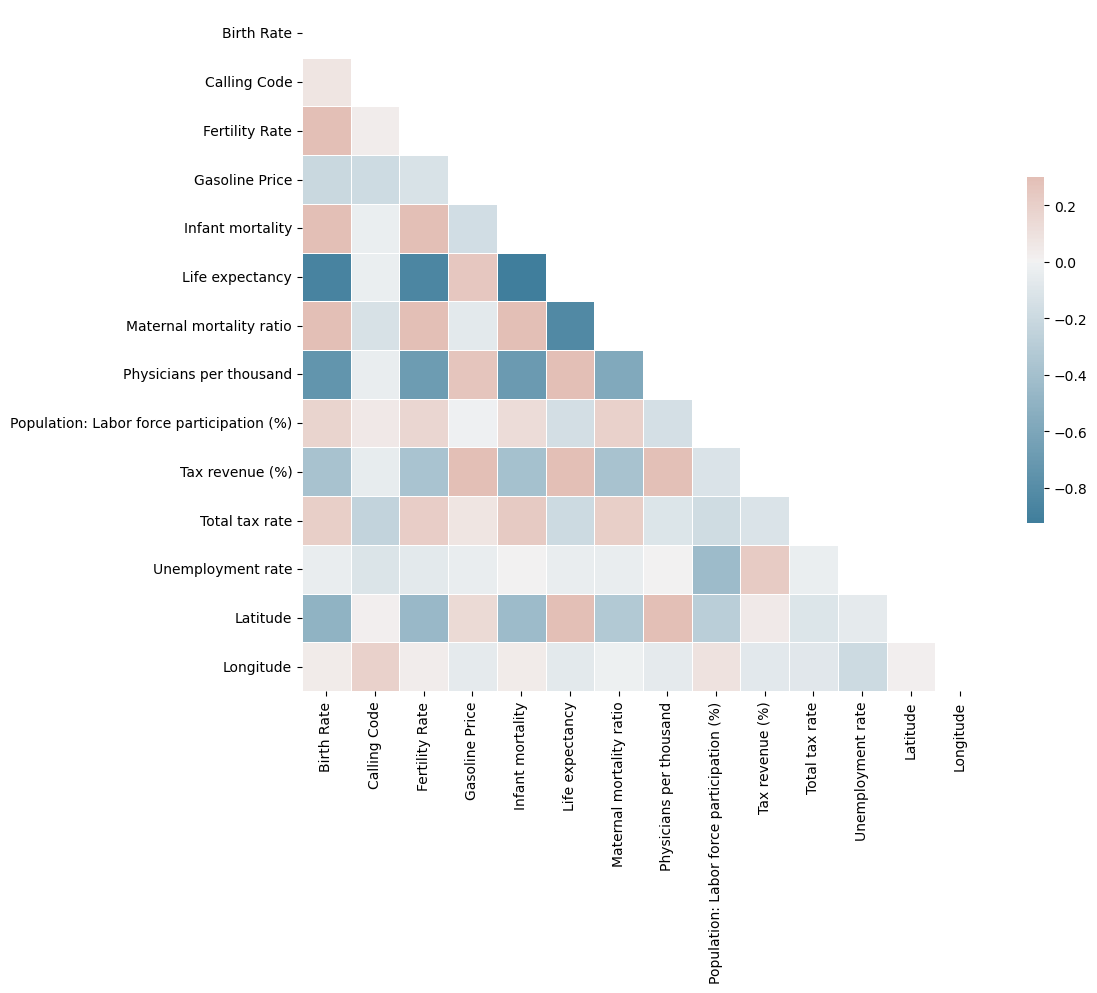

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


In [17]:
import pandas as pd
import plotly.express as px

# Normalize the KPIs
kpi_df = df[['GDP', 'Population', 'Life expectancy', 'CPI']]
kpi_df_normalized = (kpi_df - kpi_df.min()) / (kpi_df.max() - kpi_df.min())

# Add the 'Country' column
kpi_df_normalized['Country'] = df['Country']

# Create the parallel coordinates plot
fig = px.parallel_coordinates(kpi_df_normalized, color="Life expectancy", labels={"GDP": "GDP", "Population": "Population", "Life expectancy": "Life Expectancy", "CPI": "CPI"}, color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=0.5)
fig.show()


/tmp/ipykernel_20/2828735426.py:6: FutureWarning:

The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

/tmp/ipykernel_20/2828735426.py:6: FutureWarning:

The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

/tmp/ipykernel_20/2828735426.py:6: FutureWarning:

The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [18]:
import plotly.express as px

# Geographic heatmap of GDP
fig = px.choropleth(df, locations='Country', locationmode='country names', color='GDP', hover_name='Country', color_continuous_scale=px.colors.sequential.Plasma, title='Global GDP')
fig.show()

# Geographic heatmap of Population
fig = px.choropleth(df, locations='Country', locationmode='country names', color='Population', hover_name='Country', color_continuous_scale=px.colors.sequential.Plasma, title='Global Population')
fig.show()


In [19]:
import plotly.express as px

# 3D scatter plot of GDP, Population, and Life Expectancy
fig = px.scatter_3d(df, x='GDP', y='Population', z='Life expectancy', color='Country', opacity=0.7)
fig.update_traces(marker=dict(size=5))
fig.show()


In [20]:
import plotly.express as px

# 3D scatter plot of GDP, Population, and CPI
fig = px.scatter_3d(df, x='GDP', y='Population', z='CPI', color='Country')
fig.update_traces(marker=dict(size=5))
fig.show()
